Pushpendra 23b1023-
Nischal 23b1024-
Nithin 23b0993

**Load the data**

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle
import matplotlib.pyplot as plt
# Load and preprocess data
data = pd.read_csv('train.csv')
X = data['x'].values.reshape(-1, 1)
Y = data['y'].values

**Preprocess the data**

In [6]:
# Scale both X and Y
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
print(X_scaled.shape)
Y_scaled = scaler_Y.fit_transform(Y.reshape(-1, 1)).ravel()

(400, 1)


**Generate functions**

In [7]:
# Generate polynomial features
def generate_polynomial_features(X, degree):
    return np.column_stack([X**i for i in range(1, degree+1)])

# OLS implementation
def calculate_ols_coefficients(X, Y):
    X = np.column_stack([np.ones(X.shape[0]), X])
    return np.linalg.inv(X.T @ X) @ X.T @ Y

# Prediction function
def predict(X, beta):
    X = np.column_stack([np.ones(X.shape[0]), X])
    return X @ beta

**Iterate training model on degree**

In [8]:
# Experiment with different degrees
for degree in range(1, 30):
    X_poly = generate_polynomial_features(X_scaled, degree)
    
    # Split data
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y_scaled, test_size=0.2, random_state=42)
    
    # Fit model
    beta = calculate_ols_coefficients(X_train, Y_train)
    print(beta.shape)
    # Make predictions
    Y_pred_train = predict(X_train, beta)
    Y_pred_test = predict(X_test, beta)
    
    # Calculate R-squared
    r2_train = r2_score(Y_train, Y_pred_train)
    r2_test = r2_score(Y_test, Y_pred_test)
    
    print(f"Degree {degree}:")
    print(f"R-squared (train): {r2_train}")
    print(f"R-squared (test): {r2_test}")
    print()
    


(2,)
Degree 1:
R-squared (train): 0.7240003361575471
R-squared (test): 0.7659301634974767

(3,)
Degree 2:
R-squared (train): 0.7587321609992169
R-squared (test): 0.8024157248497208

(4,)
Degree 3:
R-squared (train): 0.8316111365847486
R-squared (test): 0.8776829081113264

(5,)
Degree 4:
R-squared (train): 0.8965159629806656
R-squared (test): 0.9183401547701044

(6,)
Degree 5:
R-squared (train): 0.9004716088580216
R-squared (test): 0.9241644443152974

(7,)
Degree 6:
R-squared (train): 0.9010005335856965
R-squared (test): 0.9221433766508841

(8,)
Degree 7:
R-squared (train): 0.9010166477601999
R-squared (test): 0.922120297964424

(9,)
Degree 8:
R-squared (train): 0.9010318814313325
R-squared (test): 0.9221242660557938

(10,)
Degree 9:
R-squared (train): 0.9021672419935697
R-squared (test): 0.9204502760595651

(11,)
Degree 10:
R-squared (train): 0.9022074064389902
R-squared (test): 0.920367800220645

(12,)
Degree 11:
R-squared (train): 0.9022100868108324
R-squared (test): 0.92038931226860

(22,)
Degree 21:
R-squared (train): 0.9069671084835184
R-squared (test): 0.9219675109572456

(23,)
Degree 22:
R-squared (train): 0.9015998448785988
R-squared (test): 0.9213310656807187

(24,)
Degree 23:
R-squared (train): 0.6770645425473888
R-squared (test): 0.7154567905246279

(25,)
Degree 24:
R-squared (train): -0.21068400086618433
R-squared (test): 0.03329212900637757

(26,)
Degree 25:
R-squared (train): 0.12906144700080024
R-squared (test): 0.311625551703162

(27,)
Degree 26:
R-squared (train): -38.27253378801955
R-squared (test): -29.942198535779976

(28,)
Degree 27:
R-squared (train): -177.1554188359014
R-squared (test): -160.0551808338896

(29,)
Degree 28:
R-squared (train): -10.521955825697638
R-squared (test): -9.24860475644419

(30,)
Degree 29:
R-squared (train): -63.586402812010775
R-squared (test): -56.767607201406676



**for degree equal to 5 getting max r2 score**

In [9]:
X_poly = generate_polynomial_features(X_scaled, degree)
    
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y_scaled, test_size=0.2, random_state=42)
    
# Fit model
beta = calculate_ols_coefficients(X_train, Y_train)

with open('3_weights.pkl', 'wb') as f:  # 'wb' means write in binary mode
    pickle.dump(beta, f)


In [10]:
with open('3_weights.pkl', 'rb') as f:  # 'rb' means read in binary mode
    loaded_beta = pickle.load(f)

print(loaded_beta)  # This will print the loaded beta array

[ 1.64217838e+01  1.14799643e+00 -3.81836980e+01 -3.29556933e+01
  2.82054310e+01  2.28303114e+02  6.10851052e+01 -8.10539573e+02
 -3.01523437e+02  1.58309561e+03  6.24995133e+02 -1.80306958e+03
 -7.61666657e+02  1.14853658e+03  5.81509932e+02 -2.75291355e+02
 -2.74141221e+02 -1.25454442e+02  6.64522320e+01  1.02338984e+02
  3.73545802e+00 -1.05714411e+01 -8.73468800e+00 -1.36657268e+01
  2.99587603e+00  6.57082907e+00 -4.86506323e-01 -1.23143301e+00
  3.24416565e-02  8.77620697e-02]


**Predictions on test Data**

In [ ]:
# Load and preprocess data
test_data = pd.read_csv('test.csv')
X = test_data['x'].values.reshape(-1, 1)

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

X_poly = generate_polynomial_features(X_scaled, degree)


# Make predictions
Y_pred = predict(X_poly, beta)

test_data['y'] = Y_pred

test_data[['id', 'x', 'y']].to_csv('3_predictions.csv', index=False)



**Implementing SSR and R2 coefficient**

In [97]:
def calculate_ssr(Y, Y_pred):
    return np.sum((Y - Y_pred)**2)

def calculate_r2(Y, Y_pred):
    ssr = calculate_ssr(Y, Y_pred)
    sst = np.sum((Y - np.mean(Y))**2)
    return 1 - (ssr / sst)

**Part B**

In [2]:
def plot_fit(degree, X_scaled, Y_scaled):
    # Split data
    X_train, X_dev, Y_train, Y_dev = train_test_split(X_scaled, Y_scaled, shuffle=True,test_size=0.1, random_state=42)
    
    X_poly_train = generate_polynomial_features(X_train, degree)
    X_poly_dev = generate_polynomial_features(X_dev, degree)
    
    beta = calculate_ols_coefficients(X_poly_train, Y_train)
    print(beta.shape)
    # Sort for smooth curve
    X_plot = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
    X_poly_plot = generate_polynomial_features(X_plot, degree)
    Y_plot = predict(X_poly_plot, beta)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, Y_train, color='blue', alpha=0.5, label='Train Data')
    plt.scatter(X_dev, Y_dev, color='red', alpha=0.5, label='Dev Data')
    plt.plot(X_plot, Y_plot, color='green', label='Model Prediction')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.savefig(f'degree_{degree}_fit.png')
    plt.show()
    plt.close()

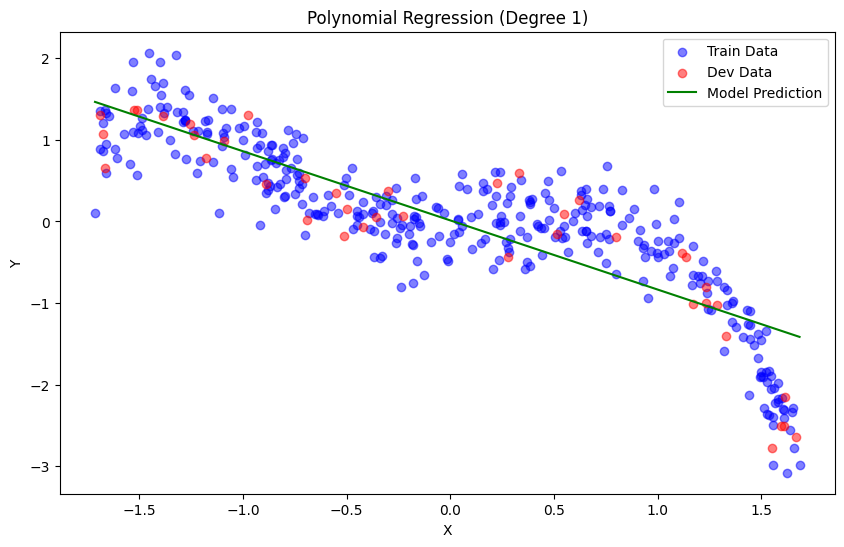

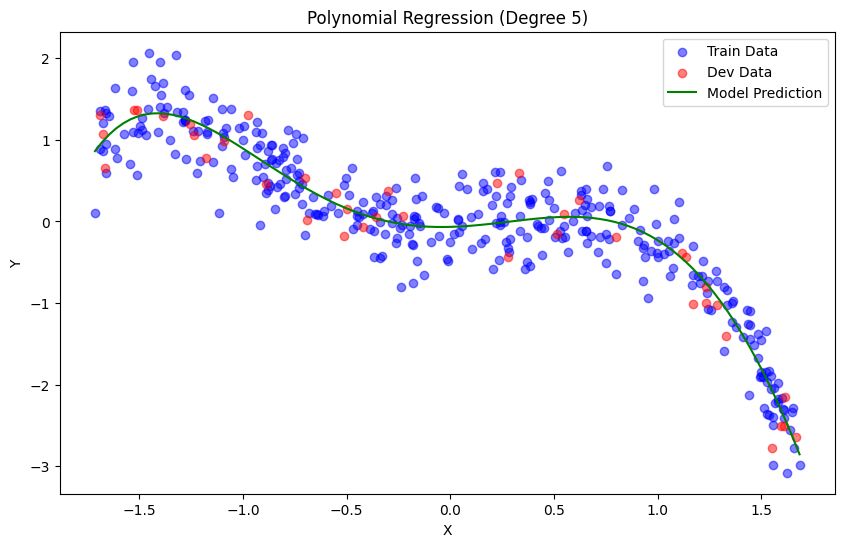

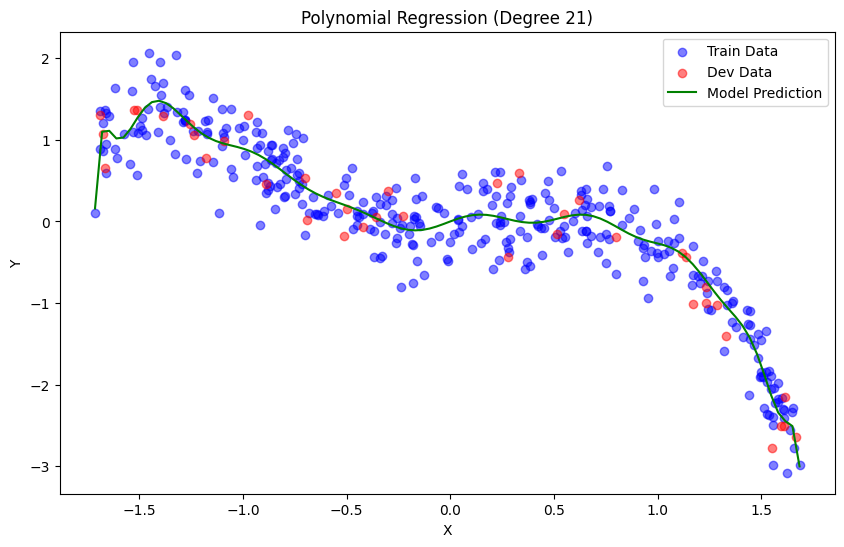

In [113]:
data = pd.read_csv('train.csv')
X = data['x'].values.reshape(-1, 1)
Y = data['y'].values

scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y.reshape(-1, 1)).ravel()

plot_fit(1, X_scaled, Y_scaled)  # Underfit
plot_fit(5, X_scaled, Y_scaled)  # Correct fit
plot_fit(21, X_scaled, Y_scaled)  # Overfit

**Metrics for above degree**

In [114]:
for degree in [1, 5, 21]:
    X_poly = generate_polynomial_features(X_scaled, degree)
    
    # Split data
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)
    
    # Fit model
    beta = calculate_ols_coefficients(X_train, Y_train)
    
    # Make predictions
    Y_pred_train = predict(X_train, beta)
    Y_pred_test = predict(X_test, beta)
    
    # Calculate SSR and R^2
    ssr_train = calculate_ssr(Y_train, Y_pred_train)
    ssr_test = calculate_ssr(Y_test, Y_pred_test)
    r2_train = calculate_r2(Y_train, Y_pred_train)
    r2_test = calculate_r2(Y_test, Y_pred_test)
    
    print(f"Degree {degree}:")
    print(f"SSR (train): {ssr_train:.2f}")
    print(f"SSR (test): {ssr_test:.2f}")
    print(f"R^2 (train): {r2_train:.4f}")
    print(f"R^2 (test): {r2_test:.4f}")
    print()

Degree 1:
SSR (train): 542626.37
SSR (test): 125511.85
R^2 (train): 0.7240
R^2 (test): 0.7659

Degree 5:
SSR (train): 195676.80
SSR (test): 40664.19
R^2 (train): 0.9005
R^2 (test): 0.9242

Degree 21:
SSR (train): 182990.75
SSR (test): 41932.32
R^2 (train): 0.9069
R^2 (test): 0.9218

